# Calculate & Compare Feature Importance

...

**Data Sources**

- `models/elastic_net_final.pkl`: Best ElasticNet pipeline / model.


**Changes**

- 2019-04-04: Start notebook and perform calculations for ElasticNet model
- ...


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Import-libraries,-load-data" data-toc-modified-id="Import-libraries,-load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Import libraries, load data</a></span></li><li><span><a href="#Calculate-Feature-Importance-for-ElasticNet-Model" data-toc-modified-id="Calculate-Feature-Importance-for-ElasticNet-Model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Calculate Feature Importance for ElasticNet Model</a></span><ul class="toc-item"><li><span><a href="#Get-Feature-Names" data-toc-modified-id="Get-Feature-Names-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get Feature Names</a></span></li></ul></li></ul></div>

---

## Import libraries, load data

In [25]:
# Import libraries
import numpy as np
import pandas as pd
from tqdm import tqdm

from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.externals import joblib
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.utils import resample

# My functions
import EDA_functions as EDA
import cleaning_functions as cleaning
from linRegModel_class import LinRegModel
import custom_transformers as transform

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns #, sns.set_style('whitegrid')
color = 'rebeccapurple'
%matplotlib inline

# Display settings
from IPython.display import display
pd.options.display.max_columns = 100

In [27]:
# Load labels and model
%store -r feature_names
elastic_net_final = joblib.load('models/elastic_net_final.pkl')

## Calculate Feature Importance for ElasticNet Model

In [43]:
EN_coefs = pd.DataFrame(elastic_net_final.coef_.round(2), index=feature_names, columns=['weight'])
# Sort by absolute weights

coefs_df['abs_coefs'] = np.abs(coefs_df['effect'])

        coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)

        coefs_df.drop('abs_coefs', axis=1, inplace=True)


KeyError: MSSubClass               0.00
LotFrontage              0.01
LotArea                  0.04
OverallQual              0.06
OverallCond              0.05
YearBuilt                0.05
YearRemodAdd             0.01
MasVnrArea               0.00
BsmtFinSF1               0.02
BsmtFinSF2               0.00
BsmtUnfSF                0.00
TotalBsmtSF              0.04
1stFlrSF                 0.00
2ndFlrSF                 0.00
LowQualFinSF             0.01
GrLivArea                0.12
BsmtFullBath             0.02
BsmtHalfBath             0.00
FullBath                 0.01
HalfBath                 0.01
BedroomAbvGr             0.01
KitchenAbvGr             0.01
TotRmsAbvGrd             0.00
Fireplaces               0.01
GarageYrBlt              0.00
GarageCars               0.01
GarageArea               0.02
WoodDeckSF               0.01
OpenPorchSF              0.00
EnclosedPorch            0.00
                         ... 
GarageQual_Po            0.00
GarageQual_TA            0.00
GarageQual_nan           0.00
GarageCond_Ex            0.00
GarageCond_Fa            0.00
GarageCond_Gd            0.00
GarageCond_Po            0.00
GarageCond_TA            0.00
GarageCond_nan           0.00
PavedDrive_N             0.00
PavedDrive_P             0.01
PavedDrive_Y             0.00
PavedDrive_nan           0.00
SaleType_COD             0.03
SaleType_CWD             0.00
SaleType_Con             0.00
SaleType_ConLD           0.00
SaleType_ConLI           0.00
SaleType_ConLw           0.03
SaleType_New             0.05
SaleType_Oth             0.00
SaleType_WD              0.00
SaleType_nan             0.00
SaleCondition_Abnorml    0.00
SaleCondition_AdjLand    0.00
SaleCondition_Alloca     0.00
SaleCondition_Family     0.07
SaleCondition_Normal     0.00
SaleCondition_Partial    0.00
SaleCondition_nan        0.00
Name: weight, Length: 308, dtype: float64

In [63]:
def print_coef_weights(model, feature_names, drop_zero=False):
    ''' Returns DataFrame with coefficient weights for the features. If 
    drop_zero ist True, then only features with weights != 0 are returned.
    
    ARGUMENTS:
    model: fitted model instance
    feature_names: list or index of column_labels
    drop_zero: bool, drop coefs with 0 weight (default=False)

    RETURNS:
    coefs_df: dataframe holding coeff weights and error
    '''
    
    coefs_df = pd.DataFrame(elastic_net_final.coef_, 
                            index=feature_names, 
                            columns=['weight']
                           )
    
    # Sort by absolute weights
    coefs_df['abs_weight'] = np.abs(coefs_df['weight'])
    coefs_df = coefs_df.sort_values('abs_weight', ascending=False)
    coefs_df.drop('abs_weight', axis=1, inplace=True)
    
    if drop_zero == True:
        coefs_df = coefs_df.loc[coefs_df['weight'] != 0]
    
    return coefs_df

In [64]:
EN_weights = print_coef_weights(elastic_net_final, feature_names, drop_zero=True)

In [79]:
def plot_coef_weights(coefs_df, feature_names, n_plot=30):
    
    plt.figure(figsize=(12, 8))
    plt.title("Top-{0:d} features".format(n_plot), size=14)
    coefs_df.iloc[:n_plot, 0].apply(np.abs).plot(kind='bar', color=color)
    
    n_features = len(feature_names)
    n_weights = len(coefs_df.loc[coefs_df['weight'] != 0])
    print('\n{0:d} features remaining with weight > 0, \
    \nthis equals a reduction of {1:2.2f}%'.format(
            n_weights, (1 - n_weights / n_features)*100))
 


101 features remaining with weight > 0,     
this equals a reduction of 67.21%


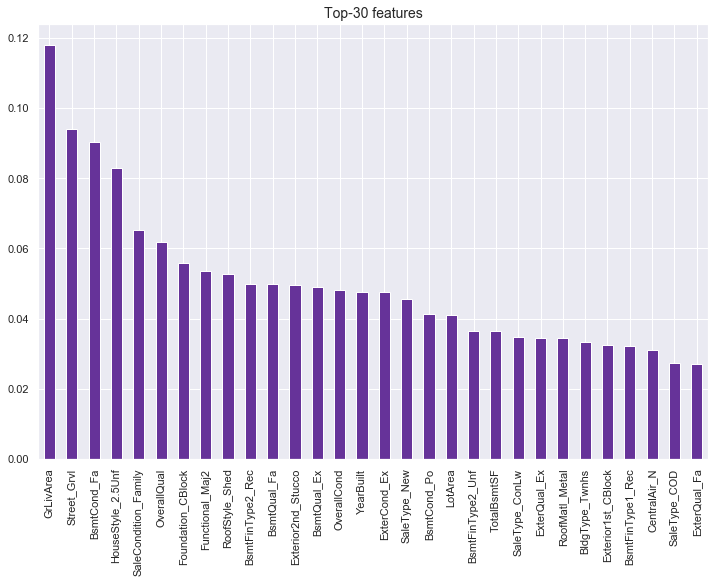

In [80]:
plot_coef_weights(EN_weights, feature_names)